# Coursework: Climate data analysis

In [260]:
# python packages needed. You can, of course, use others if you need them.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import scipy
from scipy import stats
from scipy.stats import linregress
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pickle

## TASK I - Preliminary analysis

**a. Import the `weather-denmark-resampled.pkl` dataset  provided  in  the  folderand explore  the dataset by answering the following questions.**

In [261]:
with open('weather-denmark-resampled.pkl', 'rb') as f:
    data = pickle.load(f)
data

Aalborg                                     Aarhus  \
                         Temp     Pressure  WindSpeed     WindDir   Temp   
DateTime                                                                   
1980-03-01 10:00:00  4.333333  1007.533333  11.266667  286.666667    4.0   
1980-03-01 11:00:00  5.000000  1007.766667  10.200000  280.000000    5.0   
1980-03-01 12:00:00  5.000000  1008.000000  10.300000  290.000000    5.0   
1980-03-01 13:00:00  5.000000  1008.066667   9.700000  290.000000    5.0   
1980-03-01 14:00:00  4.333333  1008.133333  11.100000  283.333333    5.0   
...                       ...          ...        ...         ...    ...   
2018-03-01 19:00:00 -4.400000  1024.200000   7.200000   70.000000   -3.6   
2018-03-01 20:00:00 -4.300000  1023.700000   6.700000   70.000000   -3.9   
2018-03-01 21:00:00 -3.900000  1023.100000   8.800000   80.000000   -3.5   
2018-03-01 22:00:00 -3.800000  1022.900000   7.200000   70.000000   -3.5   
2018-03-01 23:00:00 -4.200000  1022.500000   7.200000   70.000000   -3.4   

                                                     Esbjerg           \
                        Pressure WindSpeed WindDir      Temp Pressure   
DateTime                                                                
1980-03-01 10:00:00  1008.000000      14.9   290.0       NaN      NaN   
1980-03-01 11:00:00  1008.300000      15.4   290.0  6.083333      NaN   
1980-03-01 12:00:00  1008.600000      13.4   280.0  6.583333      NaN   
1980-03-01 13:00:00  1008.433333      15.4   280.0  6.888889      NaN   
1980-03-01 14:00:00  1008.266667      14.9   300.0  6.222222      NaN   
...                          ...       ...     ...       ...      ...   
2018-03-01 19:00:00  1022.700000       8.8    70.0 -5.000000   1022.6   
2018-03-01 20:00:00  1022.200000       8.2    60.0 -4.333333   1022.6   
2018-03-01 21:00:00  1021.700000       8.2    80.0 -5.000000   1022.6   
2018-03-01 22:00:00  1021.200000       8.2    80.0 -5.000000   1022.6   
2018-03-01 23:00:00  1021.000000       7.7    80.0 -5.333333   1022.6   

                                              Odense                          \
                     WindSpeed     WindDir      Temp     Pressure  WindSpeed   
DateTime                                                                       
1980-03-01 10:00:00        NaN         NaN  5.545455  1010.933333  11.663636   
1980-03-01 11:00:00  12.383333  310.000000  6.142857  1011.066667  12.585714   
1980-03-01 12:00:00  12.883333  310.000000  7.000000  1011.200000  11.300000   
1980-03-01 13:00:00  13.244444  309.444444  7.000000  1011.300000  12.118182   
1980-03-01 14:00:00  12.911111  306.111111  6.857143  1011.400000  12.742857   
...                        ...         ...       ...          ...        ...   
2018-03-01 19:00:00   6.366667   70.000000 -4.400000  1020.400000   8.800000   
2018-03-01 20:00:00   6.866667   80.000000 -5.000000  1019.800000   8.200000   
2018-03-01 21:00:00   8.200000   80.000000 -5.200000  1019.200000   7.700000   
2018-03-01 22:00:00   6.366667   66.666667 -5.000000  1018.700000   8.800000   
2018-03-01 23:00:00   6.533333   60.000000 -4.700000  1018.300000   9.300000   

                                 Roskilde                                  
                        WindDir      Temp Pressure  WindSpeed     WindDir  
DateTime                                                                   
1980-03-01 10:00:00  285.454545       NaN      NaN        NaN         NaN  
1980-03-01 11:00:00  290.000000  5.000000      NaN  11.466667  280.000000  
1980-03-01 12:00:00  290.000000  5.000000      NaN  12.466667  280.000000  
1980-03-01 13:00:00  290.000000  5.166667      NaN  13.133333  278.333333  
1980-03-01 14:00:00  290.000000  5.833333      NaN  12.300000  270.000000  
...                         ...       ...      ...        ...         ...  
2018-03-01 19:00:00   60.000000 -4.400000   1020.6   6.200000   60.000000  
2018-03-01 20:00:00   60.000000 -4.600000   1019.9   

In [262]:
################################### 
# i.How many cities are there in the dataset?
countCities = data.columns.get_level_values(level=0).drop_duplicates()
countCities = len(countCities)
countCities
###################################

5

In [263]:
###############################
# ii.How many observations and features are there in this dataset?
# 4 features, 333110 observations per city
countFeatures = data.columns.get_level_values(level=1).drop_duplicates()
countFeatures = len(countFeatures)
countObservatons = data.shape[0]
print("Number of Featrues:", countFeatures, "Number of Observations:", countObservatons)
###############################

Number of Featrues: 4 Number of Observations: 333110


In [264]:
###############################
# iii.What are the names of the different features?
featureNames = data.columns.get_level_values(level=1).drop_duplicates()
for name in featureNames:
    print(name, end =" ")
###############################

Temp Pressure WindSpeed WindDir 

**b. Now that you got confident with the dataset, evaluate if the dataset contains anymissing values? If so, then remove them using the pandas built-in function.**



In [265]:
###########################
numMissingValues = data.loc[:].isnull().sum().sum()
numMissingValues
data = data.dropna()

###########################

**c. Extract the general statistical properties summarising the minimum, maximum, median, mean and standard deviation values for all the features in the dataset. Spot any anomalies in these properties and clearly explain why you classify them as anomalies.**

In [266]:
###########################
data.describe()

###########################

Aalborg                                               \
                Temp       Pressure      WindSpeed        WindDir   
count  332070.000000  332070.000000  332070.000000  332070.000000   
mean        8.344553    1012.733809       4.867129     192.403707   
std         6.984943      11.693430       2.794357      88.021967   
min       -25.000000     951.900000       0.000000      10.000000   
25%         3.166667    1005.700000       2.666667     118.333333   
50%         8.111111    1013.400000       4.600000     210.000000   
75%        13.666667    1020.500000       6.700000     260.000000   
max        30.800000    1050.800000      32.900000     360.000000   

              Aarhus                                               \
                Temp       Pressure      WindSpeed        WindDir   
count  332070.000000  332070.000000  332070.000000  332070.000000   
mean        8.312325    1013.346686       4.033814     201.369146   
std         7.024914      11.281176       2.545558      82.112979   
min       -24.300000     955.500000       0.000000      10.000000   
25%         3.067308    1006.600000       2.100000     140.000000   
50%         8.000000    1014.000000       3.600000     213.333333   
75%        13.500000    1020.800000       5.600000     270.000000   
max        30.900000    1050.000000      33.400000     360.000000   

             Esbjerg                                               \
                Temp       Pressure      WindSpeed        WindDir   
count  332070.000000  332070.000000  332070.000000  332070.000000   
mean        8.556717    1013.131439       4.888487     201.843897   
std         6.742853      10.904699       2.680096      87.835192   
min       -27.000000     959.300000       0.000000      10.000000   
25%         4.000000    1006.954601       2.933333     126.666667   
50%         8.333333    1014.127073       4.516667     216.666667   
75%        13.600000    1019.861904       6.533333     273.636364   
max        54.000000    1049.300000      39.100000     360.000000   

              Odense                                               \
                Temp       Pressure      WindSpeed        WindDir   
count  332070.000000  332070.000000  332070.000000  332070.000000   
mean        8.823818    1013.802996       4.846944     195.933713   
std         6.922563      10.962173       2.766738      83.694276   
min       -22.500000     959.700000       0.000000      10.000000   
25%         3.800000    1007.300000       2.766667     126.666667   
50%         8.700000    1014.433333       4.600000     210.000000   
75%        14.000000    1021.000000       6.628571     260.000000   
max        49.900000    1048.900000      62.521795     360.000000   

            Roskilde                                               
                Temp       Pressure      WindSpeed        WindDir  
count  332070.000000  332070.000000  332070.000000  332070.000000  
mean        8.285595    1012.841385       4.831841     202.828090  
std         7.123108      11.744512       2.753835      86.120459  
min       -21.833333     959.800000       0.000000      10.000000  
25%         3.000000    1006.100000       2.766667     130.000000  
50%         8.000000    1013.833333       4.433333     220.000000  
75%        13.800000    1020.700000       6.544828     270.000000  
max        32.000000    1048.100000      25.000000     360.000000

In [267]:
# Anamolies: 
# In general, features of Temp and WindSpeed explicilty shows that they have anamolies. Using Temp of Aalborg as an example,
# there is a huge differnece in value between mean and min/max. Therefore, its min/max values can be seen as anamolies. Also, the difference
# between the 50th percentile and 75th percentile is around 5, but difference between 75th percentile and max is around 17. This reinforces the fact that
# Temp has anamoly values. Furthermore, the standard deviation and the mean of Temp of Aalborg is around 6.98 and 8.34 respectively.
# The standard deviation shows how much data are separted from the mean. Therefore, this also shows that the min and max values are anamolies.
# This trend is around the same for temp and WindSpeed of other cities.
# However, considering the characteristics of weather that has exceptional climates occasionally, these might not be anamolies, but
# in statistical view, they are anamolies.


## TASK II - OUTLIERS

The second task is focused on spotting and overcoming outliers. Follow the instructions in the following:

**d. Store the temperature measurements in May 2006 for the city of Odense. Then produce a simple plot of the temperature versus time.**

*HINT: In this dataset, the cities are vertically stacked. Therefore, we have a multi column dataset, which basically works as a nested dictionary.*


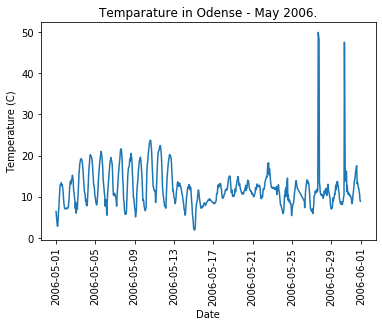

In [268]:
# start_index = data.iloc[0:1,:0]=='2006-05-01 00:00:00'].index[0]
data.iloc[0:1,:0]
# print(start_index)
# end_index = CD_NO_data[CD_NO_data['DateTime']=='2006-05-31 00:00:00'].index[0]
odenseMay2006 = data["Odense","Temp"]
odenseMay2006 = odenseMay2006.loc['2006-05-01':'2006-05-31',]

days = list(range(1,32))
# print(days)
odenseMay2006

plt.subplot()
plt.plot(odenseMay2006)
plt.title('Temparature in Odense - May 2006.')
plt.ylabel(r'Temperature (C)')
plt.xticks(rotation=90)
plt.xlabel('Date')

plt.show()


**e. Find the outliers in this set of measurements (if any) and replace them using linear interpolation.**

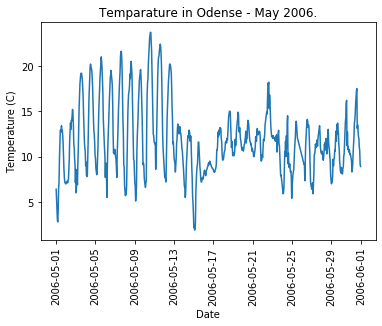

DateTime
2006-05-27 16:00:00    12.350000
2006-05-27 17:00:00    12.700000
2006-05-27 18:00:00    13.050000
2006-05-30 08:00:00    11.466667
2006-05-30 09:00:00    12.633333
Name: (Odense, Temp), dtype: float64


In [269]:
odenseMay2006IntpValues = odenseMay2006.copy()
z = np.abs(stats.zscore(odenseMay2006IntpValues))
outliers = np.where(z > 3)



for row in outliers:
    odenseMay2006IntpValues[row] = np.NaN

outliers
odenseMay2006IntpValues = odenseMay2006IntpValues.interpolate(method='values')

plt.subplot()
plt.plot(odenseMay2006IntpValues)
plt.title('Temparature in Odense - May 2006.')
plt.ylabel(r'Temperature (C)')
plt.xticks(rotation=90)
plt.xlabel('Date')

plt.show()

for row in outliers:
    print(odenseMay2006IntpValues[row])


## TASK III.1 - CORRELATION

In this last task, you will be seeking correlation between features of the data and inferring hidden patterns.  For  this  task,  you  will  be  working  with  a  smaller  dataset.  Follow  the  instructions  in  the following:

**f. We  now  take  a new  dataset (`df_perth.pkl`),  which  collects  climate  data  of  a  city  in Australia. Here we have just one year of measurements, but more features.**

In [270]:
#################################
with open('df_perth.pkl', 'rb') as f:
    data = pickle.load(f)
data

#################################

temp  pressure  relative humidity  wind speed  \
DateTime                                                             
2005-01-01 00:00:00  24.7      1015                 68         3.3   
2005-01-01 01:00:00  23.7      1015                 73         2.8   
2005-01-01 02:00:00  23.1      1015                 70         3.3   
2005-01-01 03:00:00  22.5      1015                 76         3.6   
2005-01-01 04:00:00  22.0      1015                 75         2.6   
...                   ...       ...                ...         ...   
2005-12-31 19:00:00  23.7      1013                 47         6.9   
2005-12-31 20:00:00  21.1      1013                 61         6.0   
2005-12-31 21:00:00  18.5      1013                 75         4.2   
2005-12-31 22:00:00  16.0      1013                 83         3.5   
2005-12-31 23:00:00  13.4      1013                100         3.5   

                     cloud cover  precipitation  PV production  \
DateTime                                                         
2005-01-01 00:00:00            0            0.0              0   
2005-01-01 01:00:00            0            0.0              0   
2005-01-01 02:00:00            0            0.0              0   
2005-01-01 03:00:00            0            0.0              0   
2005-01-01 04:00:00            0            0.0              0   
...                          ...            ...            ...   
2005-12-31 19:00:00            1            0.0              1   
2005-12-31 20:00:00            1            0.0              0   
2005-12-31 21:00:00            1            0.0              0   
2005-12-31 22:00:00            1            0.0              0   
2005-12-31 23:00:00            1            0.0              0   

                     diffuse radiation, tilt  solar azimuth  
DateTime                                                     
2005-01-01 00:00:00                        0           -2.5  
2005-01-01 01:00:00                        0          -19.1  
2005-01-01 02:00:00                        0          -33.4  
2005-01-01 03:00:00                        0          -45.5  
2005-01-01 04:00:00                        0          -55.4  
...                                      ...            ...  
2005-12-31 19:00:00                        1           61.1  
2005-12-31 20:00:00                        0           52.2  
2005-12-31 21:00:00                        0           41.4  
2005-12-31 22:00:00                        0           28.5  
2005-12-31 23:00:00                        0           13.3  

[8760 rows x 9 columns]

**g. Find any significant correlations between features.**

*HINT: you might find useful looking fortrends and recurrent patterns within the data*

In [271]:
data.corr(method='pearson')

temp  pressure  relative humidity  wind speed  \
temp                     1.000000 -0.000713          -0.761345    0.343214   
pressure                -0.000713  1.000000          -0.253514    0.007968   
relative humidity       -0.761345 -0.253514           1.000000   -0.340895   
wind speed               0.343214  0.007968          -0.340895    1.000000   
cloud cover             -0.090391 -0.782275           0.272694   -0.060845   
precipitation           -0.062609 -0.245895           0.175913   -0.011236   
PV production            0.529136  0.162544          -0.646227    0.249162   
diffuse radiation, tilt  0.440259 -0.216266          -0.459441    0.194775   
solar azimuth            0.360599 -0.001735          -0.428187    0.269784   

                         cloud cover  precipitation  PV production  \
temp                       -0.090391      -0.062609       0.529136   
pressure                   -0.782275      -0.245895       0.162544   
relative humidity           0.272694       0.175913      -0.646227   
wind speed                 -0.060845      -0.011236       0.249162   
cloud cover                 1.000000       0.248765      -0.181765   
precipitation               0.248765       1.000000      -0.068143   
PV production              -0.181765      -0.068143       1.000000   
diffuse radiation, tilt     0.258931      -0.002506       0.742691   
solar azimuth              -0.010382       0.014081       0.034108   

                         diffuse radiation, tilt  solar azimuth  
temp                                    0.440259       0.360599  
pressure                               -0.216266      -0.001735  
relative humidity                      -0.459441      -0.428187  
wind speed                              0.194775       0.269784  
cloud cover                             0.258931      -0.010382  
precipitation                          -0.002506       0.014081  
PV production                           0.742691       0.034108  
diffuse radiation, tilt                 1.000000       0.044362  
solar azimuth                           0.044362       1.000000

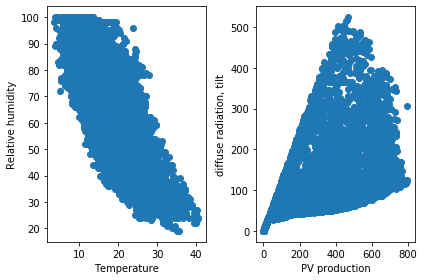

In [277]:
#################################

# temp - relative humidity
# pressure - cloud cover
# PV production - diffuse radiation, tilt

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False)

ax1.scatter(data['temp'], data['relative humidity'])
ax1.set_xlabel(r'Temperature')
ax1.set_ylabel(r'Relative humidity')

ax2.scatter(data['PV production'], data['diffuse radiation, tilt'])
ax2.set_xlabel(r'PV production')
ax2.set_ylabel(r'diffuse radiation, tilt')


plt.tight_layout()
plt.show()


# print(linregress(data['pressure'], data['cloud cover']))
# print(linregress(data['temp'], data['relative humidity']))

#################################

**h. We now focus on the correlation between precipitation and cloud cover. We want to infer the probability of having moderate to heavy rain (> 1 mm/h) as a function of the cloud cover index.**

*HINT: you might find useful to create a new column where you have 0 if precipitation < 1 mm/h and 1 otherwise*

In [293]:
#################################
newData = data[['precipitation', 'cloud cover']].copy()
newData.loc[newData['precipitation'] < 1, 'precipitation'] = 0
newData.loc[newData['precipitation'] >= 1, 'precipitation'] = 1
newData

#################################

precipitation  cloud cover
DateTime                                       
2005-01-01 00:00:00            0.0            0
2005-01-01 01:00:00            0.0            0
2005-01-01 02:00:00            0.0            0
2005-01-01 03:00:00            0.0            0
2005-01-01 04:00:00            0.0            0
...                            ...          ...
2005-12-31 19:00:00            0.0            1
2005-12-31 20:00:00            0.0            1
2005-12-31 21:00:00            0.0            1
2005-12-31 22:00:00            0.0            1
2005-12-31 23:00:00            0.0            1

[8760 rows x 2 columns]

## TASK III.2 - INFERENCE

**i. Let’s now assume that we want to predict the photovoltaic production (PV production) using  multiple  linear  regression.  Explain  which  features  are  statistically  significant  in modelling the target variable.**

In [19]:
#################################


#################################

**j. Create a multivariate model using the predictors chosen in the previous question.**

In [20]:
#################################


#################################